Trading return

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from price_process import price_paths
from simulation import run_simulation

In [2]:
def trading_algo(cash=10000, prices=None):
    if prices is None:
        prices = price_paths()
    
    shares = 0
    portfolio_values = [cash]

    for i in range(1, len(prices)):
        price_i = prices[i]
        last_price = prices[i-1]
        if price_i > last_price and cash >= price_i:
            shares_to_buy = cash // price_i
            shares += shares_to_buy
            cash -= shares_to_buy * price_i
        elif price_i < last_price and shares > 0:
            cash += shares * price_i
            shares = 0
        portfolio_value = cash + shares * price_i
        portfolio_values.append(portfolio_value)
    
    return portfolio_values


Plot saved to: plots/trading_return.pdf


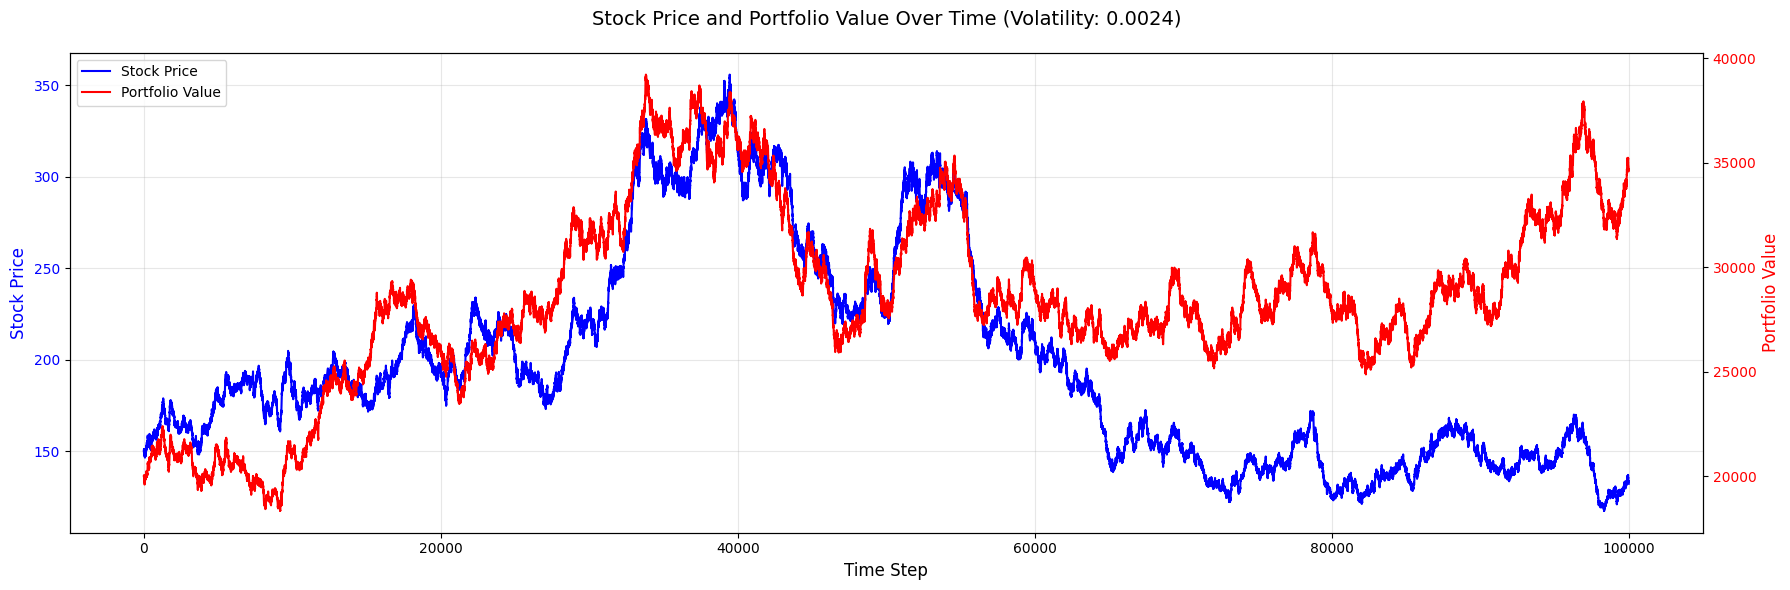


Initial cash: $20,000.00
Final portfolio value: $34,692.08
Return: 73.46%


([150,
  150.61462793042455,
  150.47710277817828,
  150.38116492464593,
  149.96403338640707,
  150.58841908196143,
  150.65403553761305,
  151.11168706341707,
  150.71352955566948,
  151.0141984726129,
  150.96739314904053,
  150.76032329007614,
  150.86270450149487,
  150.38257873191367,
  150.21560322678266,
  149.68712923533656,
  150.25187171299785,
  150.53675064208159,
  150.45664524364892,
  151.09769149667596,
  150.61627843262272,
  150.94994637636185,
  151.09450552000126,
  151.00057903351544,
  150.82604711176558,
  150.38271032767932,
  150.8654186674681,
  151.16004376767953,
  150.56891843915392,
  150.4520583889039,
  150.70899034433572,
  150.23318688281458,
  150.02990358831016,
  150.4396516031012,
  150.22289970024315,
  149.93965879247202,
  150.31876700403495,
  149.89882543940294,
  149.7277828811862,
  149.84753967844526,
  149.7372402818937,
  149.0761000597338,
  149.13749089533437,
  148.36938412641422,
  148.1972734854997,
  148.23239202745847,
  148.54141

In [3]:
run_simulation(
    trading_algo=trading_algo,
    initial_price=150, 
    n_steps=100000, 
    initial_cash=20000,
    save_path="plots/trading_return.pdf"
)